# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

In [1]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras

In [2]:
def load_iris():
    _dataset_iris = datasets.load_iris()
    _x = _dataset_iris.data
    _iris_target = _dataset_iris.target
    _y = keras.utils.to_categorical(_iris_target, dtype='uint8')
    return _x, _y


x, y = load_iris()
x.shape, y.shape

((150, 4), (150, 3))

In [3]:
weights_list = []

In [4]:
class WeightsCollectorCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        global weights_list
        i_weights = self.model.get_weights()
        weights_list.append(i_weights)

In [5]:
def plot_weights(_activation: str, optimizer_name: str):
    global weights_list
    rr = range(len(weights_list))
    _layers_count = len(weights_list[0]) // 2
    _cmap = matplotlib.colormaps.get_cmap('viridis')
    _colors = _cmap(np.linspace(0, 1, _layers_count))
    plt.title('"Weights" L:{} A:{} O:{}'.format(_layers_count, _activation, optimizer_name))
    for le2 in range(_layers_count):  # layers
        l = le2 * 2
        b = l + 1
        _in, _out = weights_list[0][l].shape
        for _i in range(_in):  # inputs
            for _o in range(_out):  # outputs
                plt.plot([weights_list[i][l][_i][_o] for i in rr], color=_colors[le2])
                plt.plot([weights_list[i][b][_o] for i in rr], color=_colors[le2])
    plt.savefig(f'img/weights_l_{_layers_count}_a_{_activation}_o_{optimizer_name}.png'.lower(), dpi=200)
    plt.show()

In [6]:
def experiment(_layers_count: int, _activation: str, _optimizer, epochs: int):
    global x, y, weights_list
    weights_list = []
    input_shape = x.shape[1:]  # (4,)
    output_neurons = y.shape[1]  # 3
    model_layers = [keras.layers.Dense(2, activation=_activation, name='layer_0', input_shape=input_shape)]
    for i in range(1, _layers_count - 1):
        model_layers.append(keras.layers.Dense(2, activation=_activation, name=f'layer_{i}'))
    model_layers.append(keras.layers.Dense(output_neurons, activation='softmax', name='layer_out'))
    model = keras.Sequential(model_layers)
    model.summary()
    print(len(model_layers))
    model.compile(
        optimizer=_optimizer,
        loss=keras.losses.MeanSquaredError()
    )
    history = model.fit(x, y, epochs=epochs, callbacks=[WeightsCollectorCallback()])
    plot_weights(_activation, _optimizer.name)
    plt.title(f'Loss L:{_layers_count} A:{_activation} O:{_optimizer.name}')
    plt.plot(history.history['loss'])
    plt.savefig(f'img/loss_l_{_layers_count}_a_{_activation}_o_{_optimizer.name}.png'.lower(), dpi=200)
    plt.show()

In [7]:
# experiment(6, 'sigmoid', keras.optimizers.SGD(learning_rate=0.03), epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2300
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2296
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2294
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2291
Epoch 6/1000
5/5 [===

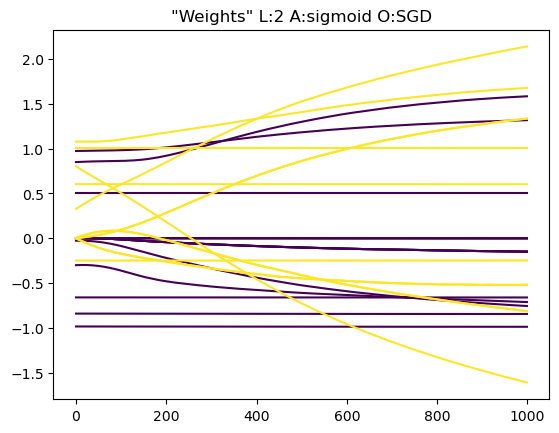

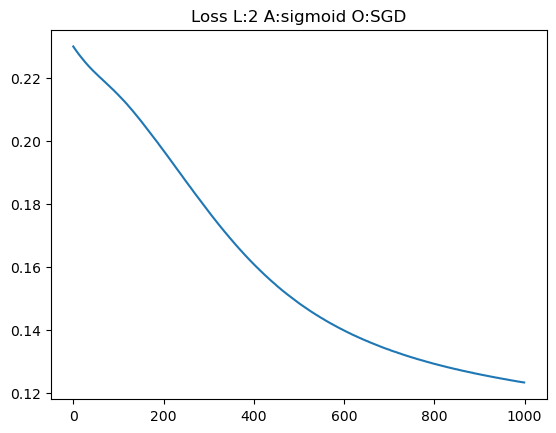

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2234
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2224
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2216
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2157
Epoch 6/1000
5/5 [=

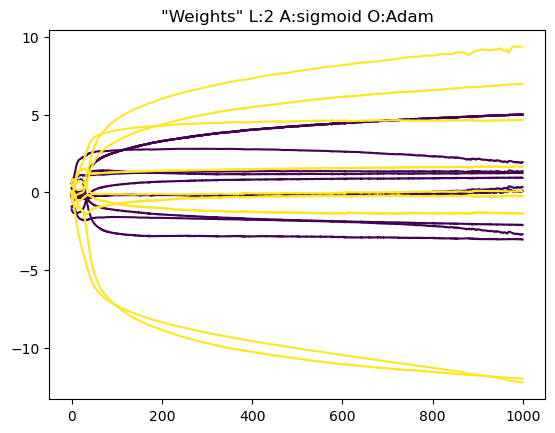

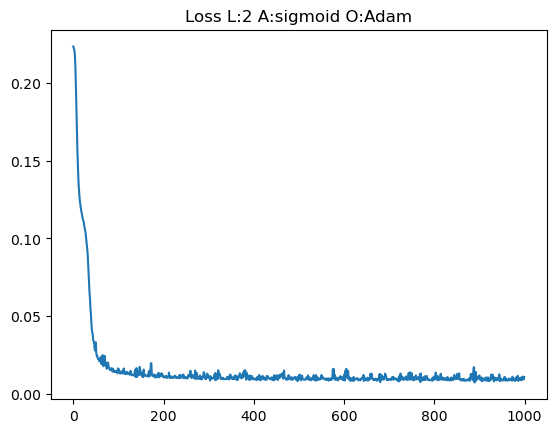


Experimento con 2 capas, sigmoid y SGD: 19.875253438949585 segundos

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2010
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1978
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 4/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1911
Epoch 5/1000
5/5 [==========

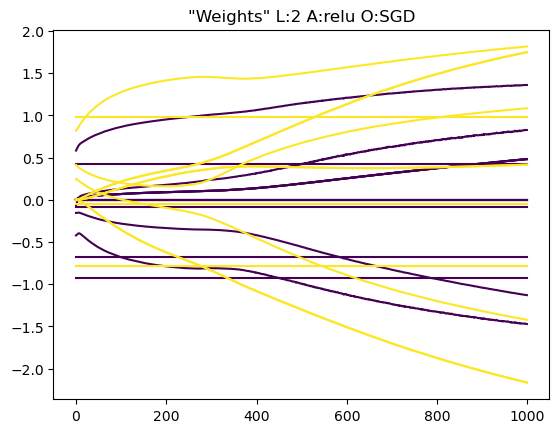

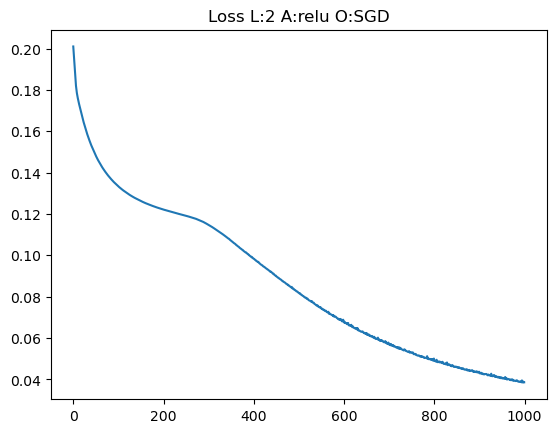

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2763
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2156
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 4/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2046
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1868
Epoch 6/1000
5/5 [=

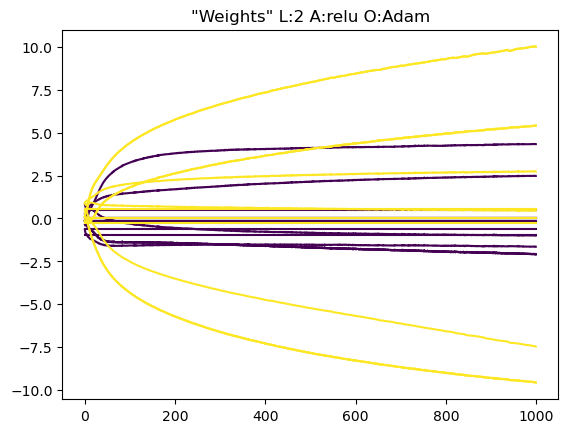

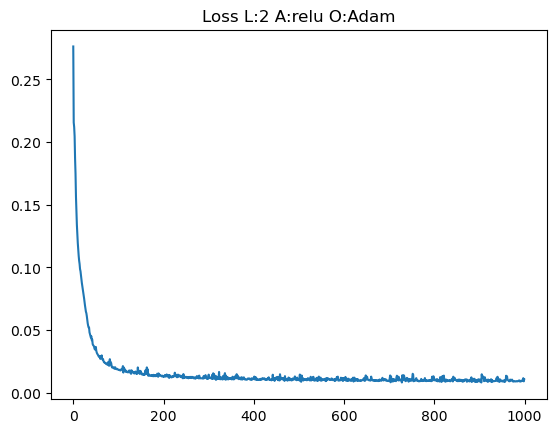


Experimento con 2 capas, relu y SGD: 19.001038551330566 segundos

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2324
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2320
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 4/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2313
Epoch 5/1000
5/5 [=============

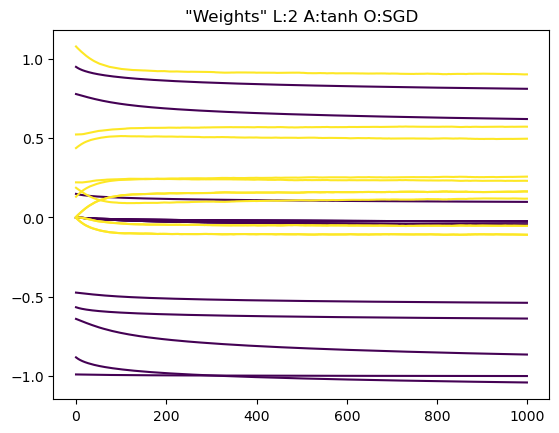

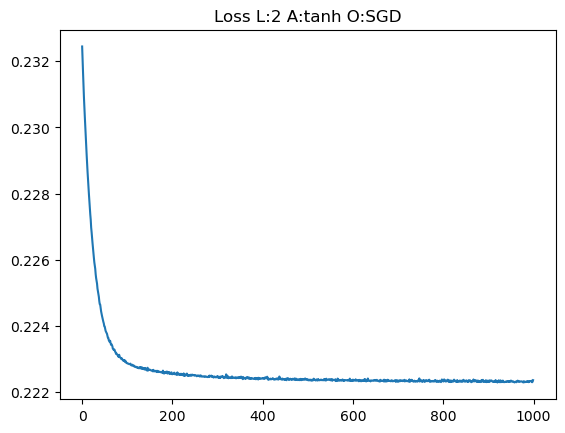

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2044
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.1801
Epoch 4/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1523
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1261
Epoch 6/1000
5/5 [=

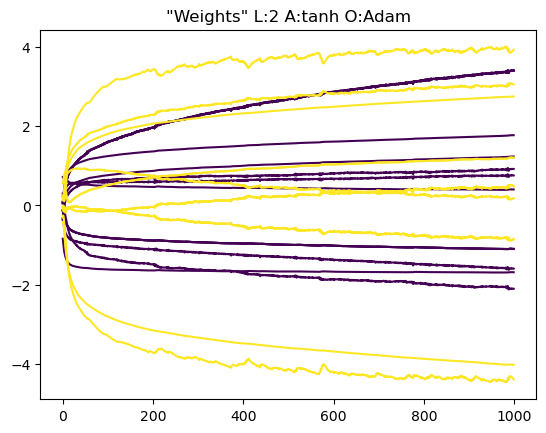

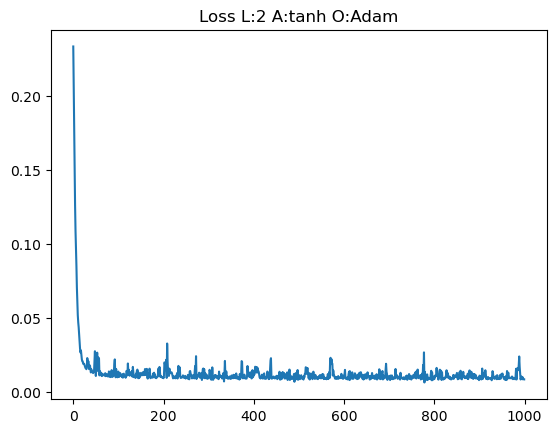


Experimento con 2 capas, tanh y SGD: 18.343788623809814 segundos

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2378
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2368
Epoch 3/1000
5/5 [==============================] - 0s 

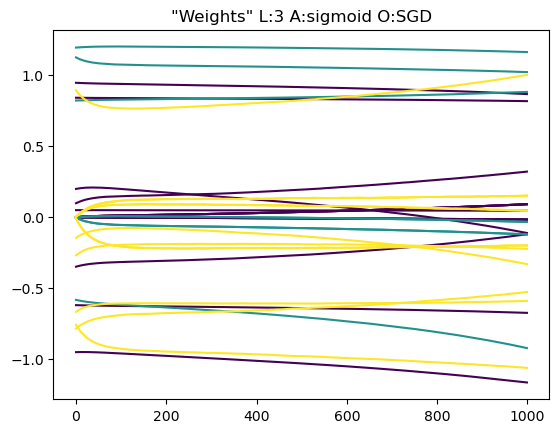

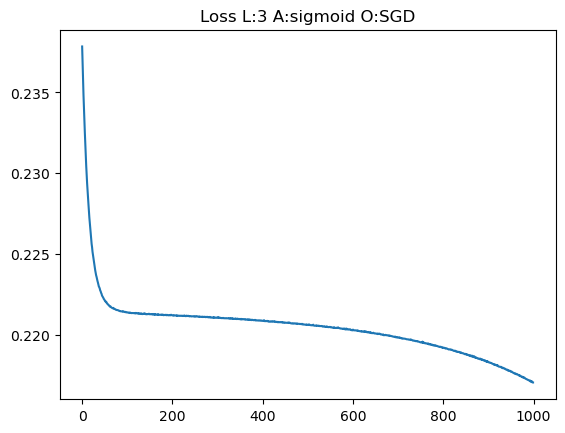

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2510
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2259
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2226
Epoch 4/1000
5/5 [=========================

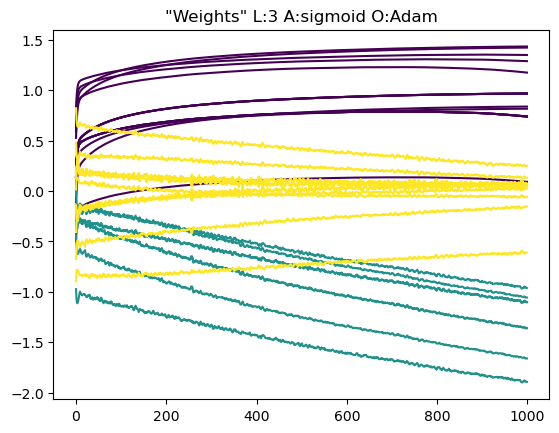

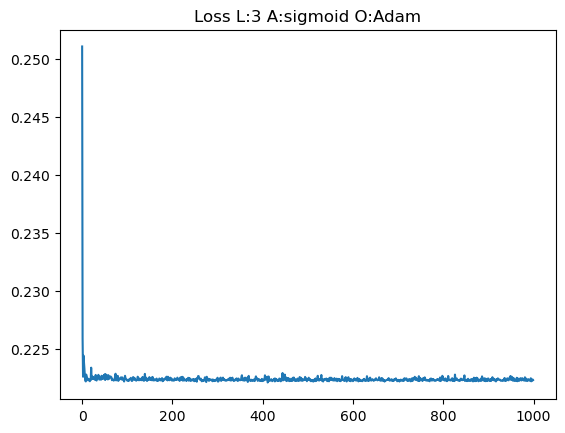


Experimento con 3 capas, sigmoid y SGD: 19.412928581237793 segundos

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2471
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2440
Epoch 3/1000
5/5 [==============================] - 

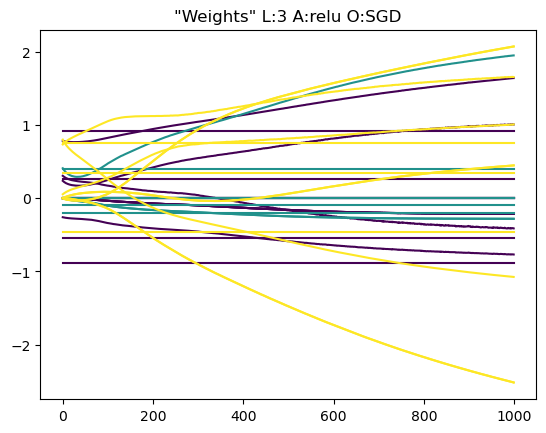

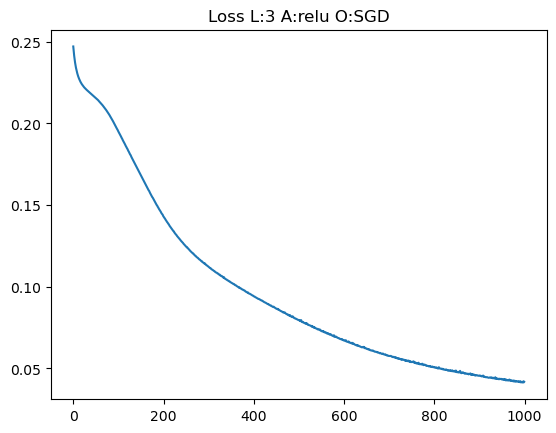

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2321
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2228
Epoch 3/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2225
Epoch 4/1000
5/5 [=========================

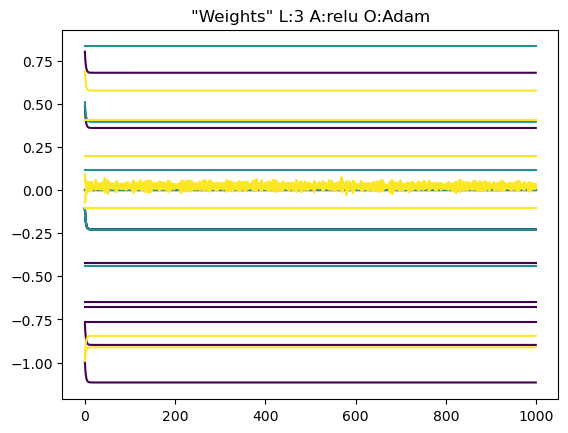

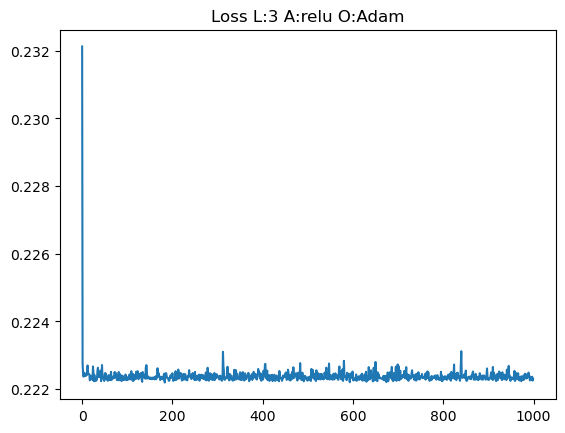


Experimento con 3 capas, relu y SGD: 19.77599549293518 segundos

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2542
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 3/1000
5/5 [==============================] - 0s 

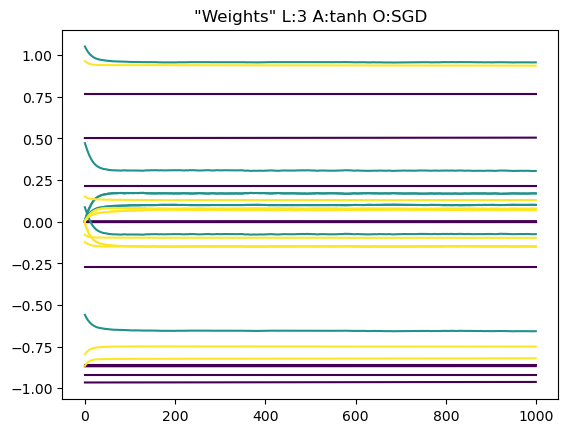

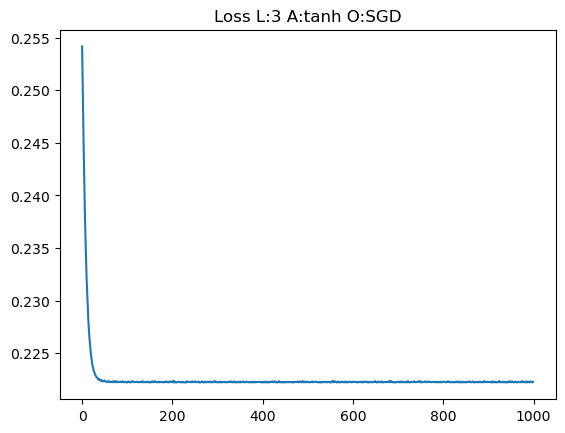

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 3/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 4/1000
5/5 [========================

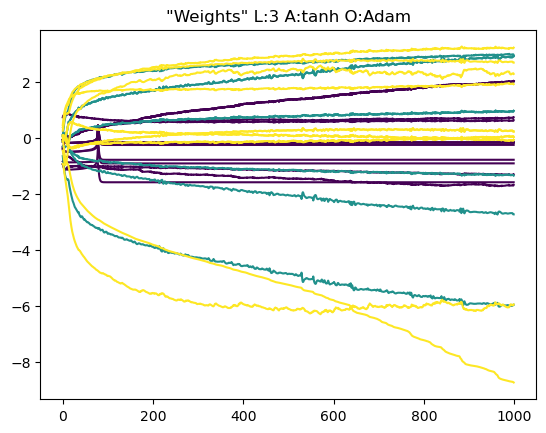

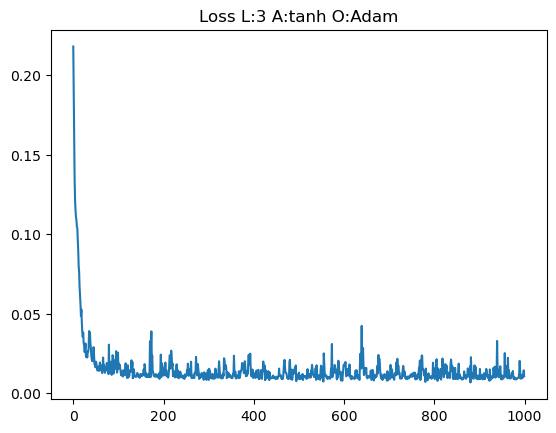


Experimento con 3 capas, tanh y SGD: 19.70067286491394 segundos

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2246
Ep

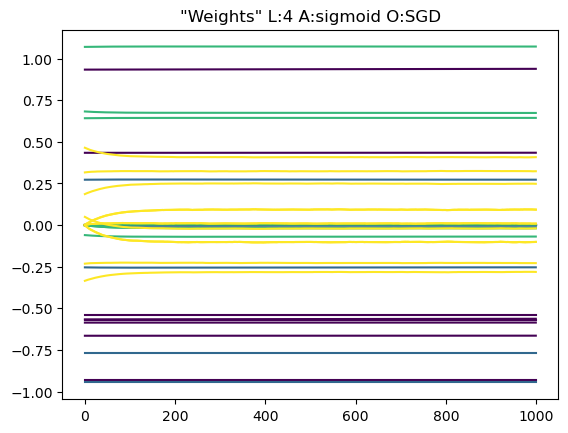

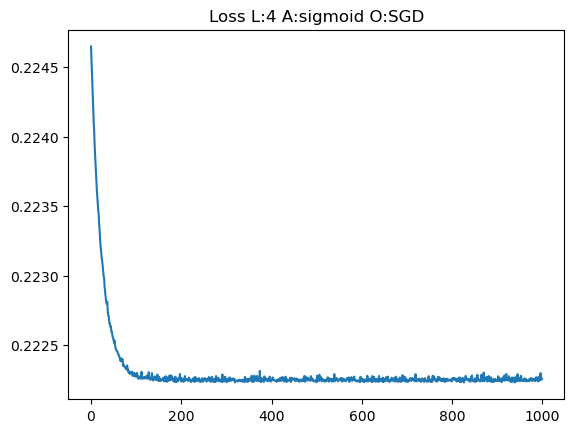

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2262
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - lo

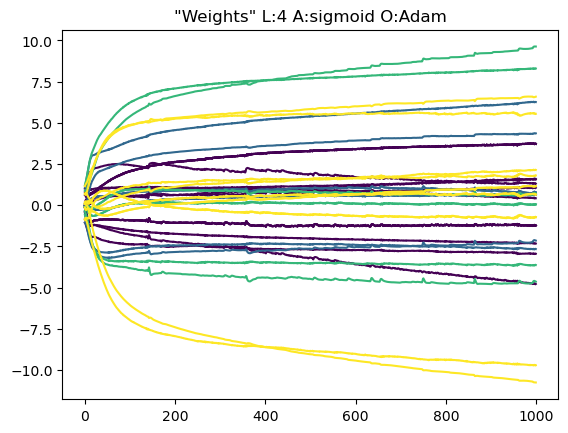

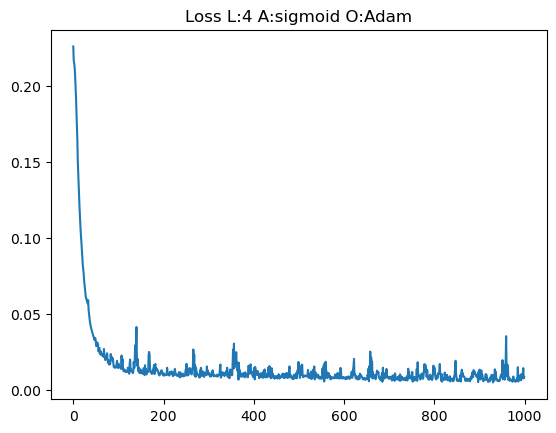


Experimento con 4 capas, sigmoid y SGD: 20.525468826293945 segundos

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.222

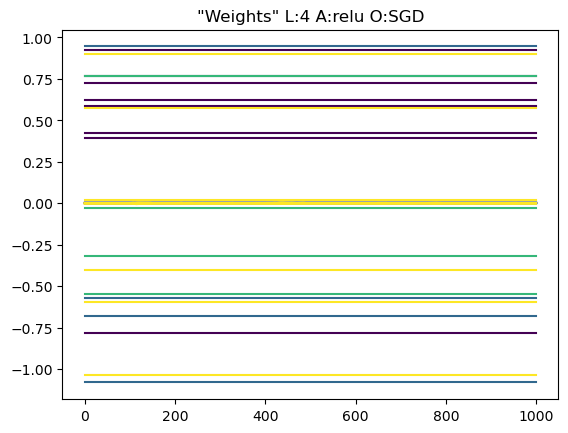

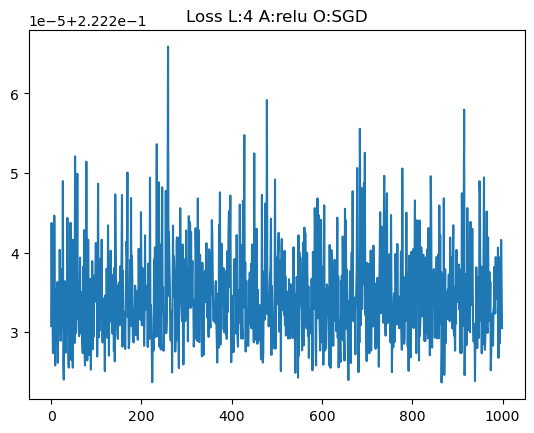

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 1s 2ms/step - loss: 0.2230
Epoch 2/1000
5/5 [==============================] - 0s 2ms/step - lo

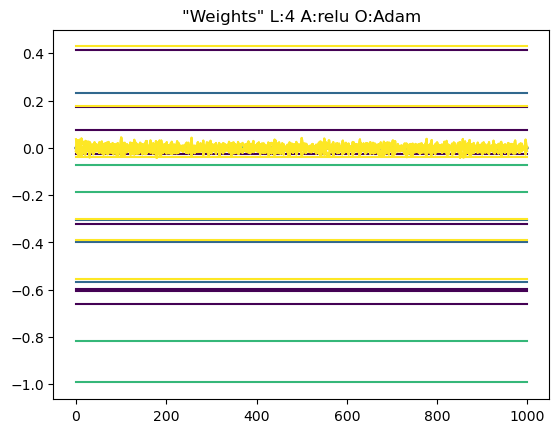

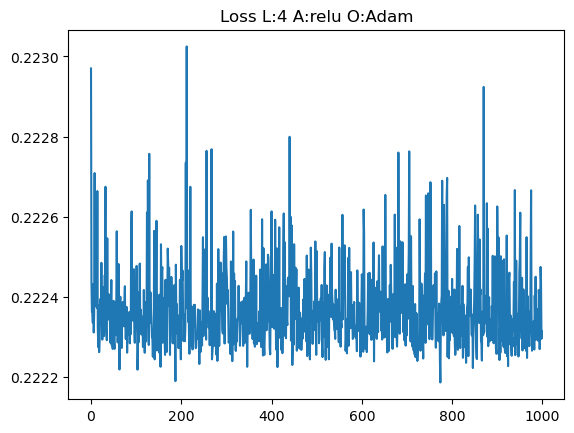


Experimento con 4 capas, relu y SGD: 20.662636280059814 segundos

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2869
E

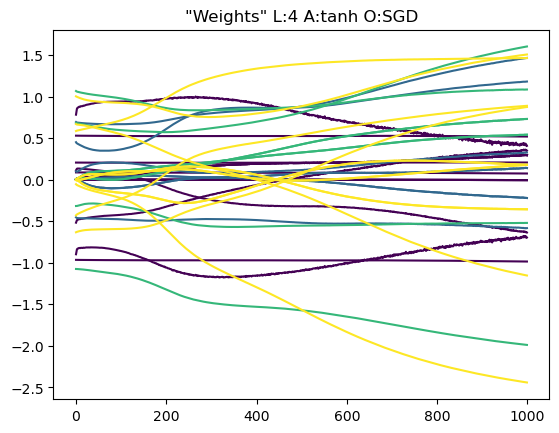

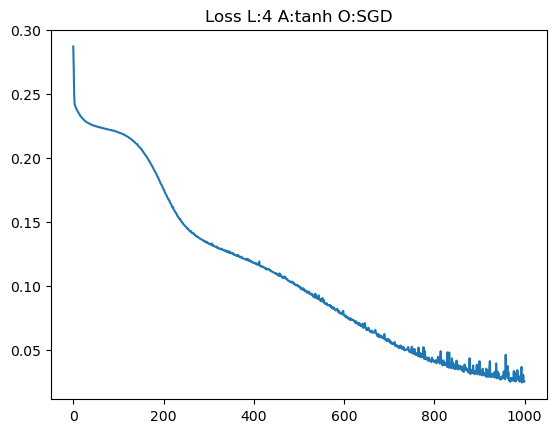

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4
Epoch 1/1000
5/5 [==============================] - 1s 2ms/step - loss: 0.2639
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - lo

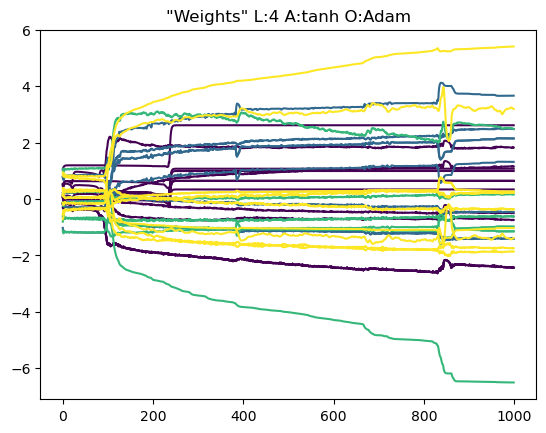

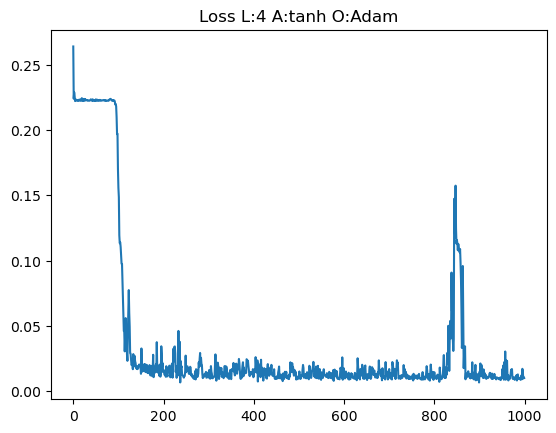


Experimento con 4 capas, tanh y SGD: 20.783278226852417 segundos

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________

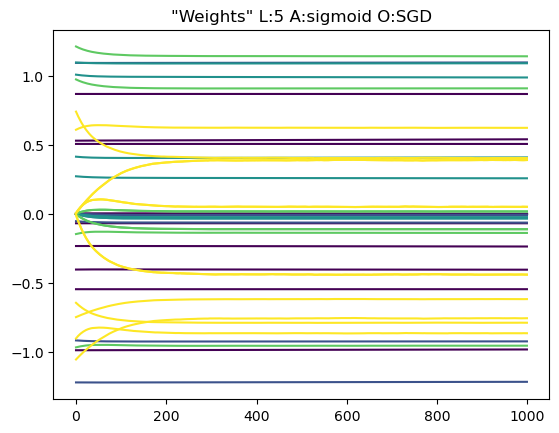

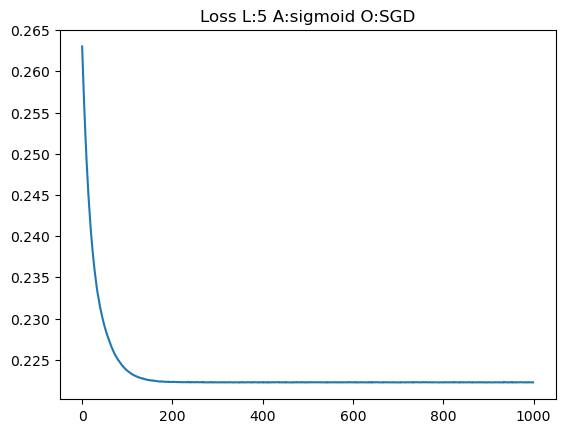

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5
Epoch 1/1000
5/

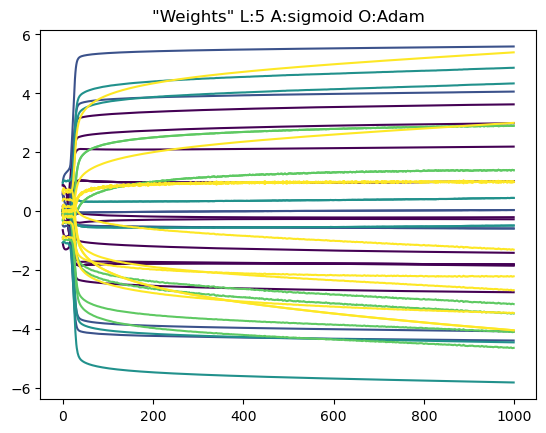

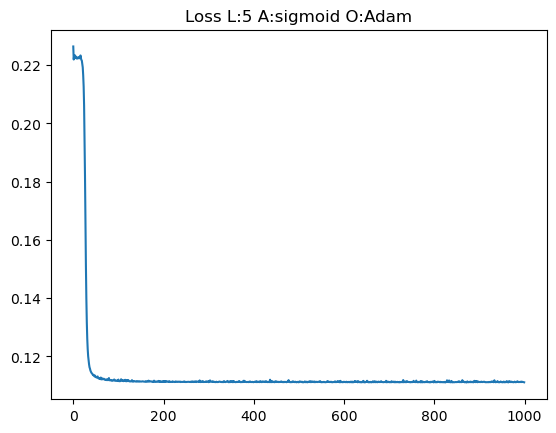


Experimento con 5 capas, sigmoid y SGD: 21.763667821884155 segundos

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_____________

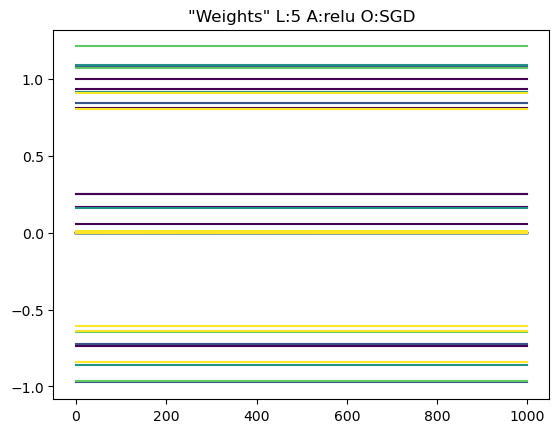

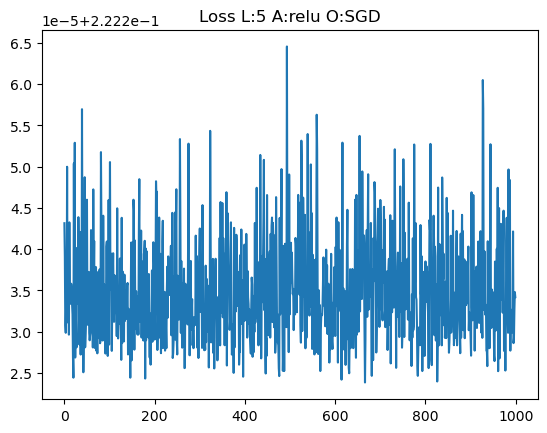

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5
Epoch 1/1000
5/

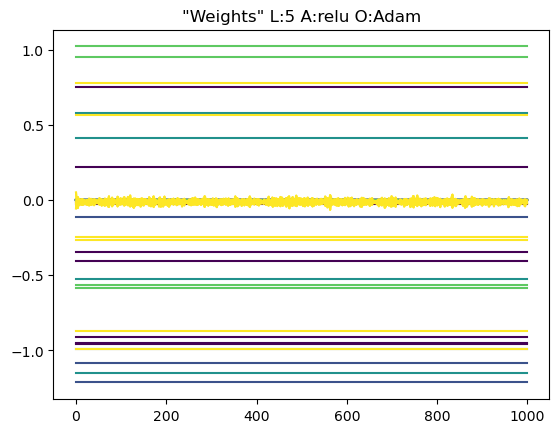

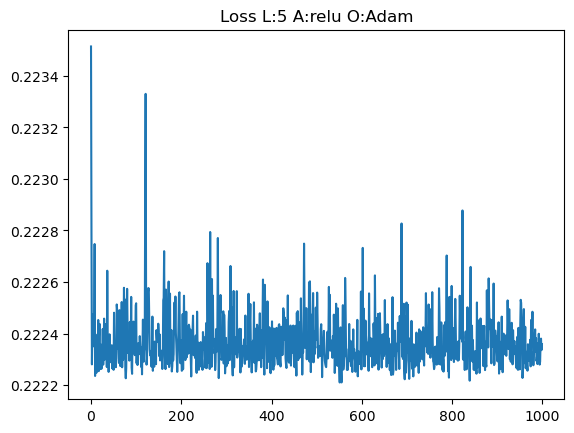


Experimento con 5 capas, relu y SGD: 21.81706666946411 segundos

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________

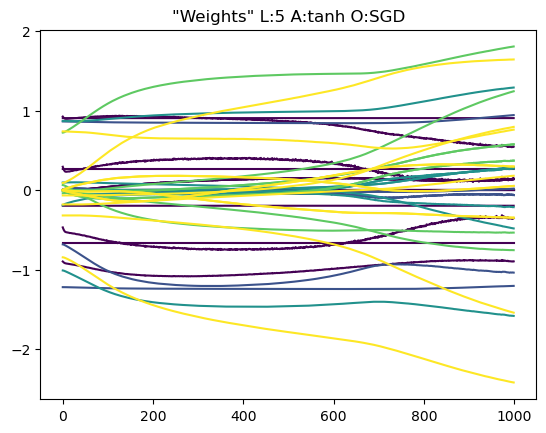

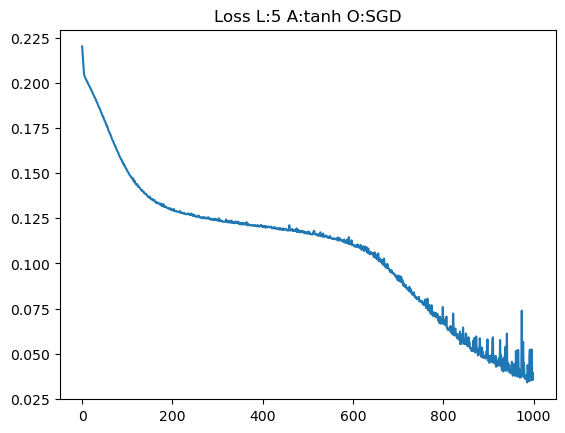

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
5
Epoch 1/1000
5/

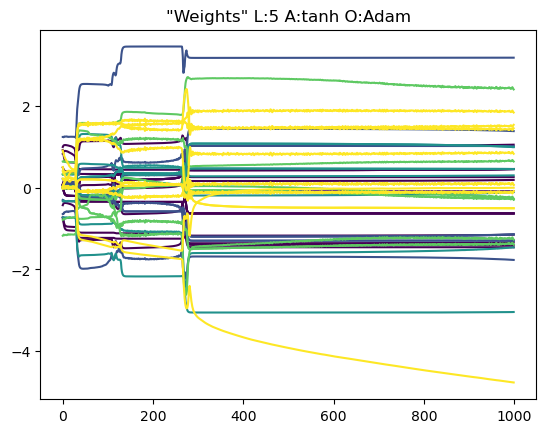

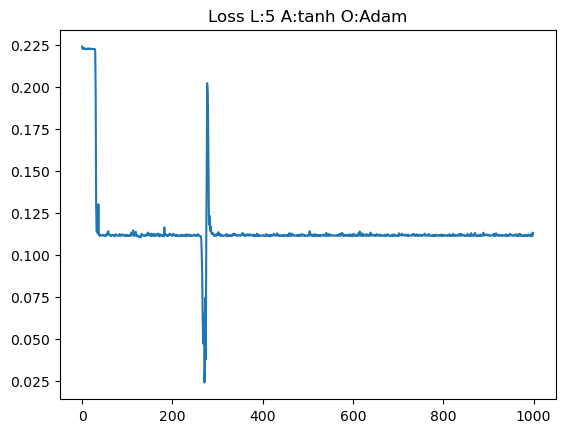


Experimento con 5 capas, tanh y SGD: 21.861405849456787 segundos

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                    

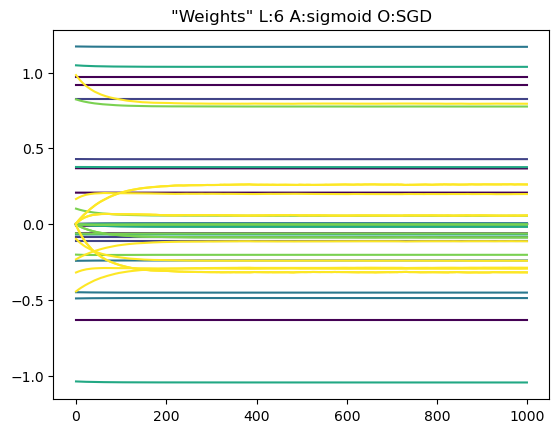

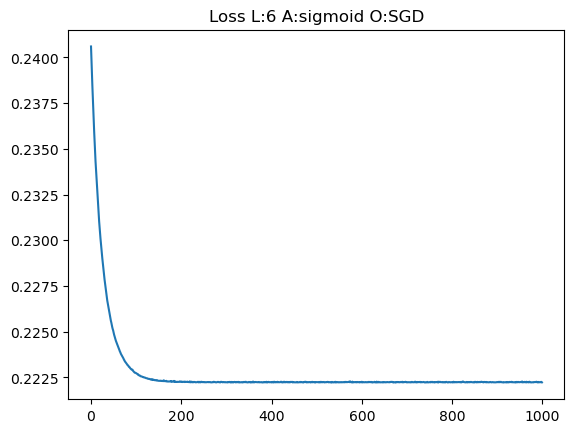

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (

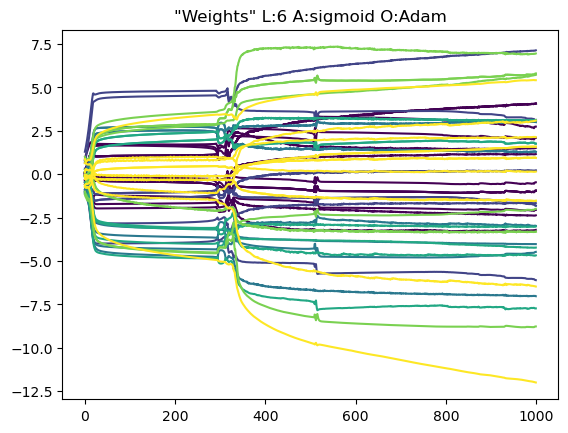

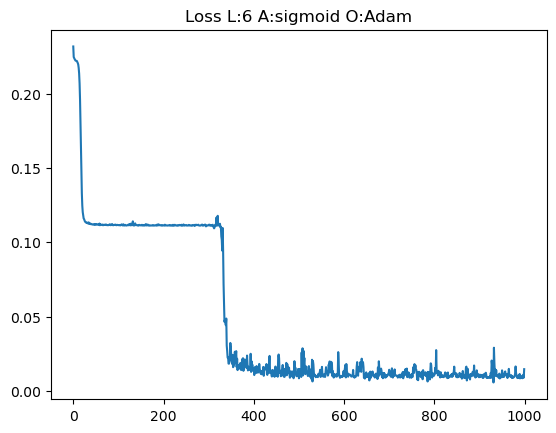


Experimento con 6 capas, sigmoid y SGD: 23.009905576705933 segundos

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                 

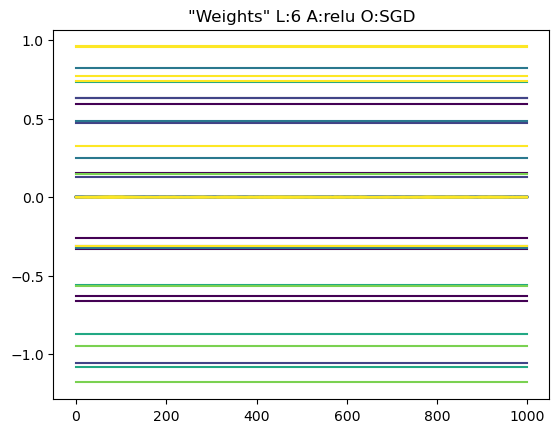

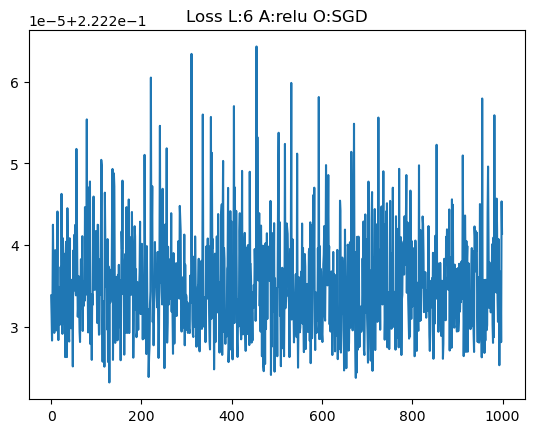

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (

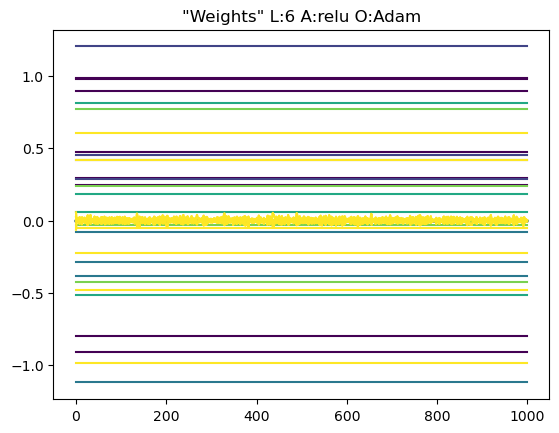

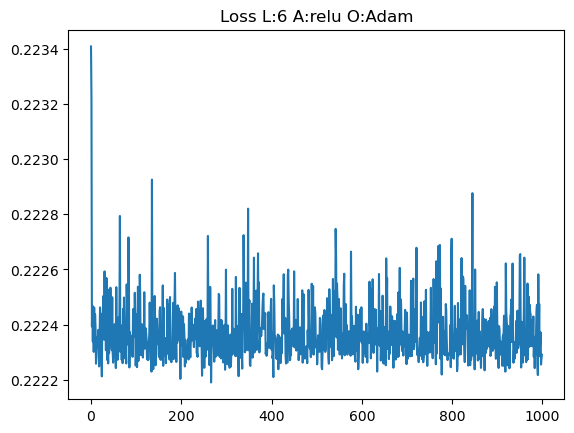


Experimento con 6 capas, relu y SGD: 22.812477827072144 segundos

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                    

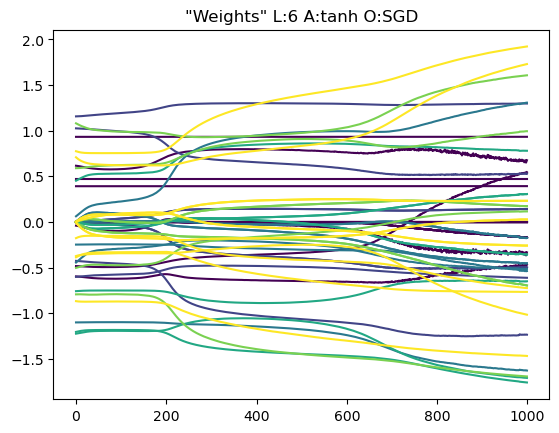

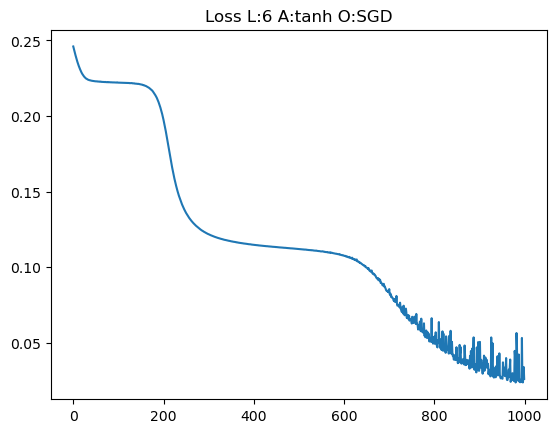

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 2)                 10        
                                                                 
 layer_1 (Dense)             (None, 2)                 6         
                                                                 
 layer_2 (Dense)             (None, 2)                 6         
                                                                 
 layer_3 (Dense)             (None, 2)                 6         
                                                                 
 layer_4 (Dense)             (None, 2)                 6         
                                                                 
 layer_out (Dense)           (None, 3)                 9         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (

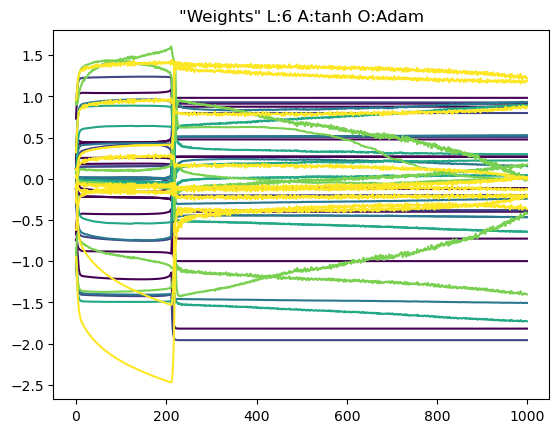

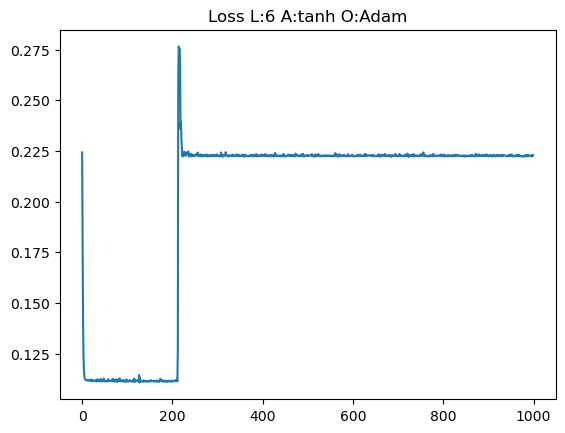


Experimento con 6 capas, tanh y SGD: 22.84678316116333 segundos



In [8]:
# > * Número de capas: {2,3,4,5,6}
# > * Función de activación: {Sigmoid, ReLu, Tanh}
# > * Optimizer: {SGD, Adam}

e_layers_count = [2, 3, 4, 5, 6]
e_activations = ['sigmoid', 'relu', 'tanh']

for lc in e_layers_count:
    for a in e_activations:
        time_start = time.time()
        experiment(lc, a, keras.optimizers.SGD(learning_rate=0.03), epochs=1000)
        experiment(lc, a, keras.optimizers.Adam(learning_rate=0.03), epochs=1000)
        print('\033[92m')
        print(f'Experimento con {lc} capas, {a} y SGD: {time.time() - time_start} segundos')
        print('\033[0m')